In [19]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

plt.rc('font', family='AppleGothic')

### 01) 데이터 전처리

In [3]:
final_df = pd.read_csv('../data/SEOUL_CLASS_1.csv')
final_df

,상권_코드_명,기준_년_코드,기준_분기_코드,업종_대분류,경영_위기_비율,상권_코드,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,...,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,유사_업종_점포_수,개업률,폐업률
0,DMC(디지털미디어시티),2022,1,외식업,0.150943,2120098,72,24,1285,8846.0,...,20.60,62.10,17.60,87.80,12.40,57.50,42.50,421,4.08,2.04
1,DMC(디지털미디어시티),2022,2,외식업,0.207547,2120098,72,24,1285,8846.0,...,21.00,60.80,18.70,86.40,13.60,56.40,43.80,424,6.08,4.39
2,DMC(디지털미디어시티),2022,3,외식업,0.142857,2120098,72,24,1285,8846.0,...,21.00,61.00,18.00,85.80,14.40,56.40,43.70,426,5.00,4.67
3,DMC(디지털미디어시티),2022,4,외식업,0.291667,2120098,72,24,1285,8846.0,...,20.70,60.40,18.80,83.00,17.00,56.80,43.20,427,6.98,6.64
4,가락시장역,2022,1,외식업,0.235294,2120234,62,3,2694,10268.0,...,15.27,49.73,35.09,77.82,22.27,61.82,38.18,294,2.74,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,홍대입구역(홍대),2022,4,유통업,0.387755,2120103,91,22,4789,9580.0,...,38.74,30.11,31.68,71.47,28.63,43.63,56.37,874,3.14,1.93
664,화곡역,2022,1,서비스업,0.166667,2120120,88,16,2748,927.0,...,21.94,48.25,30.00,81.12,18.94,49.19,50.94,254,1.22,3.27
665,화곡역,2022,2,서비스업,0.473684,2120120,88,16,2748,927.0,...,19.60,46.00,34.33,81.27,18.93,54.93,45.13,258,3.23,1.61
666,화곡역,2022,3,서비스업,0.380952,2120120,88,16,2748,927.0,...,18.20,43.60,38.27,81.40,18.67,52.40,47.87,256,1.21,2.02


In [4]:
final_df.drop(['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명'], axis=1, inplace=True)
final_df

,업종_대분류,경영_위기_비율,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,월_평균_소득_금액,클러스터,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,유사_업종_점포_수,개업률,폐업률
0,외식업,0.150943,72,24,1285,8846.0,318202,3567709.0,3,20.60,62.10,17.60,87.80,12.40,57.50,42.50,421,4.08,2.04
1,외식업,0.207547,72,24,1285,8846.0,358782,3567709.0,3,21.00,60.80,18.70,86.40,13.60,56.40,43.80,424,6.08,4.39
2,외식업,0.142857,72,24,1285,8846.0,352688,3567709.0,3,21.00,61.00,18.00,85.80,14.40,56.40,43.70,426,5.00,4.67
3,외식업,0.291667,72,24,1285,8846.0,355095,3567709.0,3,20.70,60.40,18.80,83.00,17.00,56.80,43.20,427,6.98,6.64
4,외식업,0.235294,62,3,2694,10268.0,1430185,3494644.0,1,15.27,49.73,35.09,77.82,22.27,61.82,38.18,294,2.74,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,유통업,0.387755,91,22,4789,9580.0,3897068,2934520.0,0,38.74,30.11,31.68,71.47,28.63,43.63,56.37,874,3.14,1.93
664,서비스업,0.166667,88,16,2748,927.0,1102013,2624496.0,1,21.94,48.25,30.00,81.12,18.94,49.19,50.94,254,1.22,3.27
665,서비스업,0.473684,88,16,2748,927.0,1168431,2624496.0,1,19.60,46.00,34.33,81.27,18.93,54.93,45.13,258,3.23,1.61
666,서비스업,0.380952,88,16,2748,927.0,1163547,2624496.0,1,18.20,43.60,38.27,81.40,18.67,52.40,47.87,256,1.21,2.02


In [5]:
cluster0_df = final_df[final_df['클러스터'] == 0].copy()
cluster1_df = final_df[final_df['클러스터'] == 1].copy()
cluster2_df = final_df[final_df['클러스터'] == 2].copy()
cluster3_df = final_df[final_df['클러스터'] == 3].copy()

In [6]:
cluster0_df.drop('클러스터', axis=1, inplace=True)
cluster1_df.drop('클러스터', axis=1, inplace=True)
cluster2_df.drop('클러스터', axis=1, inplace=True)
cluster3_df.drop('클러스터', axis=1, inplace=True)

In [7]:
cluster3_df

,업종_대분류,경영_위기_비율,집객시설_수,교통_인프라,총 상주인구 수,총_직장_인구_수,총_생활인구_수,월_평균_소득_금액,연령대_1020_매출_비율,연령대_3040_매출_비율,연령대_5060_매출_비율,주중_매출_비율,주말_매출_비율,남성_매출_비율,여성_매출_비율,유사_업종_점포_수,개업률,폐업률
0,외식업,0.150943,72,24,1285,8846.0,318202,3567709.0,20.60,62.10,17.60,87.80,12.40,57.50,42.50,421,4.08,2.04
1,외식업,0.207547,72,24,1285,8846.0,358782,3567709.0,21.00,60.80,18.70,86.40,13.60,56.40,43.80,424,6.08,4.39
2,외식업,0.142857,72,24,1285,8846.0,352688,3567709.0,21.00,61.00,18.00,85.80,14.40,56.40,43.70,426,5.00,4.67
3,외식업,0.291667,72,24,1285,8846.0,355095,3567709.0,20.70,60.40,18.80,83.00,17.00,56.80,43.20,427,6.98,6.64
32,외식업,0.160000,88,10,1522,7726.0,1562580,3950137.0,21.36,53.36,25.73,82.73,17.27,55.91,44.45,305,4.70,2.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,유통업,0.333333,78,4,976,9363.0,1260738,3402858.0,17.12,57.12,26.12,70.94,29.12,54.12,46.12,487,1.28,1.92
636,외식업,0.125000,77,17,6927,1932.0,1378358,4649382.0,31.20,47.60,21.40,70.00,30.20,53.30,46.70,363,2.40,2.74
637,외식업,0.071429,77,17,6927,1932.0,1513316,4649382.0,31.90,48.40,20.20,68.30,31.70,51.90,48.30,360,3.10,3.45
638,외식업,0.102564,77,17,6927,1932.0,1531543,4649382.0,33.70,47.30,19.50,68.40,31.70,51.70,48.30,357,3.82,4.17


### 02) 모델 학습

##### cluster 0

In [10]:
x1 = cluster0_df[cluster0_df['업종_대분류'] == '외식업'].drop(['경영_위기_비율', '업종_대분류'], axis=1)
y1 = cluster0_df[cluster0_df['업종_대분류'] == '외식업']['경영_위기_비율']
x1_train, x1_valid, y1_train, y1_valid= train_test_split(x1, y1, test_size=0.2, random_state=0)

In [13]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=10, n_jobs=-1)
grid_cv.fit(x1_train, y1_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 200}
최적 예측 정확도: 0.1598


In [14]:
rf = RandomForestRegressor(random_state=0, max_depth=8, min_samples_leaf=4, min_samples_split=12, n_estimators=200)
rf.fit(x1_train, y1_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=12,
                      n_estimators=200, random_state=0)

In [17]:
# train rmse
train_predict = rf.predict(x1_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y1_train))))

# valid rmse
valid_predict = rf.predict(x1_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y1_valid))))

RMSE:0.04150168005365654
RMSE:0.06300302897248979


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


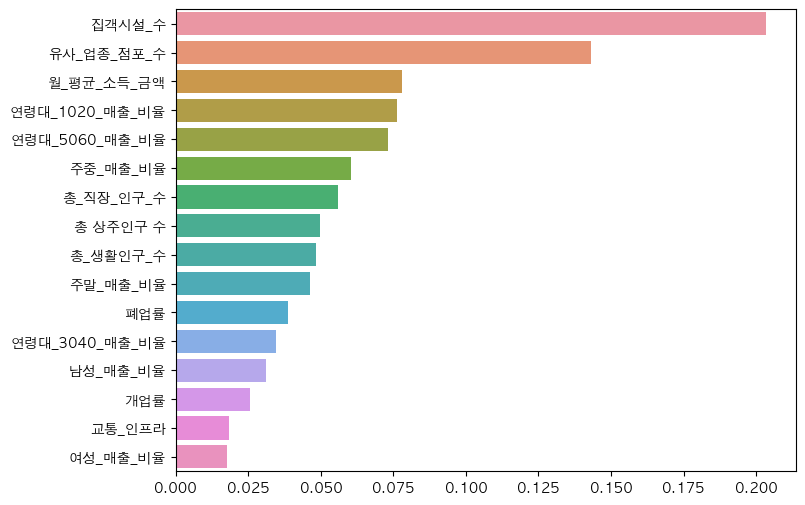

In [20]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x1_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()